In [ ]:
pip install -U kaleido

In [1]:
pip install omnixai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 534.9/534.9 kB 834.4 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.6/756.6 kB 3.6 MB/s eta 0:00:00a 0:00:01
  Created wheel for hnswlib: filename=hnswlib-0.7.0-cp37-cp37m-linux_x86_64.whl size=2246681 sha256=c2e57d1a1ef4dad079cab6901f7475d32b6946921661b13d82f0e776dca42c70
  Stored in directory: /root/.cache/pip/wheels/5f/65/1a/ab505c83cbf0b9c118702a70ec9490b249f6c33725f4c43d08
Successfully built hnswlib
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pickle as Pickle
import os
import sklearn
import xgboost
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from omnixai.data.tabular import Tabular
from omnixai.preprocessing.tabular import TabularTransform
from omnixai.explainers.tabular import MACEExplainer
import plotly.io as pio
pio.renderers.default = "png"
import io
import pandas as pd
import numpy as np
import joblib
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn import ensemble
import xgboost
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import xgboost as xgb
from sklearn import preprocessing, model_selection, svm, linear_model
import joblib
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn import tree
from sklearn import ensemble
import joblib

In [6]:
data1= pd.read_csv("/kaggle/input/fintech-data-mace/Processed_FD2.csv")
categorical_columns=['tic','Label']
le = preprocessing.LabelEncoder()
for col in categorical_columns:
    data1[col] = le.fit_transform(data1[col])



In [7]:
data1.set_index(data1['date'],inplace=True)


In [8]:
data=data1.drop(['tic','date','Date'],axis=1)


In [10]:
data

,OPM,DYCSN,debt_ratio,debt_to_equity,R.A.C.N,R.A.T.A,cur_ratio,quick_ratio,Inventory Turnover,Payables Turnover,Accounts Receivable Turnover,EPS,PB,Open,Adj Close,Volume,Label
date,,,,,,,,,,,,,,,,,
2008-03-31,8.61000,0.000000,28.50000,67.00000,17.800000,8.300000,1.90000,1.64000,3.780000,8.130000,7.920000,15.86,2.810000,21.108727,19.376768,3144382,0
2008-03-31,11.47000,0.000000,0.08000,0.33000,72.240000,19.000000,1.26000,0.00000,0.000000,16.610000,5.450000,15.36,12.520000,35.480000,26.615314,3449200,1
2008-03-31,31.09000,0.000000,8.43000,11.80000,17.920000,14.220000,3.33000,0.00000,0.000000,8.020000,9.710000,24.84,4.770000,35.689999,35.590000,8015500,1
2008-03-31,23.77000,0.000000,0.00000,0.00000,11.000000,8.850000,2.95000,2.49000,2.700000,7.900000,7.160000,19.88,3.660000,29.040001,20.280483,4900500,1
2008-03-31,20.72000,0.000000,0.00000,0.00000,30.370000,17.770000,2.03000,0.00000,0.000000,2.960000,6.320000,27.96,7.690000,31.639999,31.480000,3939200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,13.69743,2.671001,40.56679,150.66683,10.610149,2.811466,0.99527,0.86269,18.744105,7.496333,7.946069,0.00,2.422649,65.589996,63.563618,6182200,0
2022-09-30,18.61412,3.070995,12.74777,25.40974,23.160765,11.429333,1.16294,0.86853,12.274802,4.625525,9.195358,0.00,2.013059,88.169998,86.612747,21357600,1
2022-09-30,12.02346,1.483755,29.30761,74.92975,13.504411,4.960528,1.62686,1.19016,4.380187,5.247795,5.226613,0.00,4.406955,88.339996,87.127304,2155000,1


**Making Pickle File**

In [16]:

target_column='Label'
X = data.drop(target_column, axis=1)
y = data[target_column]
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

models = [
    xgb.XGBClassifier(),
    
]

def save_model(model, model_name):
    filename = '{}r.pkl'.format(model_name)
    joblib.dump(model, filename)

for model in models:
    model.fit(X_train, y_train)
    save_model(model, model.__class__.__name__)

Preprocessing

**Making a function**

In [33]:
def explain_classification_model0(data, model_pickle,target_column, ignored_features,plot=False):
    feature_names = list(data.columns)
    
    tabular_data = Tabular(
        data,
        feature_columns=feature_names,
        target_column='Label'
    )

    np.random.seed(1)
    transformer = TabularTransform().fit(tabular_data)
    class_names = transformer.class_names
    x = transformer.transform(tabular_data)
    train, test, labels_train, labels_test = \
        sklearn.model_selection.train_test_split(x[:, :-1], x[:, -1], train_size=0.80)

    model = joblib.load(model_pickle)
    model.fit(train, labels_train)

    predict_function = lambda z: model.predict_proba(transformer.transform(z))

    explainer = MACEExplainer(
        training_data=tabular_data,
        predict_function=predict_function,
        ignored_features=ignored_features
    )
    test_instances = tabular_data.remove_target_column()[0:12]
    explanations = explainer.explain(test_instances)
    
    if plot:
        buf = io.BytesIO()
        explanations.ipython_plot(index=0, class_names=class_names, renderer=buf)

**LGBM**


In [ ]:
data.columns

In [ ]:
len(data

**Taking Index=0 in test instance**

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



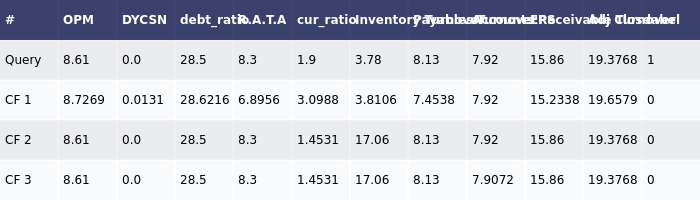

In [18]:

model_pickle='/kaggle/working/XGBClassifierr.pkl'
target_column = 'Label'
ignored_features = ["tic",'PB','Open', 'Volume']
explain_classification_model3(data, model_pickle,target_column, ignored_features,plot=True)



**Taking index=5**

In [34]:
def explain_classification_model5(data, model_pickle,target_column, ignored_features,plot=False):
    feature_names = list(data.columns)
    
    tabular_data = Tabular(
        data,
        feature_columns=feature_names,
        target_column='Label'
    )

    np.random.seed(1)
    transformer = TabularTransform().fit(tabular_data)
    class_names = transformer.class_names
    x = transformer.transform(tabular_data)
    train, test, labels_train, labels_test = \
        sklearn.model_selection.train_test_split(x[:, :-1], x[:, -1], train_size=0.80)

    model = joblib.load(model_pickle)
    model.fit(train, labels_train)

    predict_function = lambda z: model.predict_proba(transformer.transform(z))

    explainer = MACEExplainer(
        training_data=tabular_data,
        predict_function=predict_function,
        ignored_features=ignored_features
    )
    test_instances = tabular_data.remove_target_column()[0:12]
    explanations = explainer.explain(test_instances)
    
    if plot:
        buf = io.BytesIO()
        explanations.ipython_plot(index=5, class_names=class_names, renderer=buf)

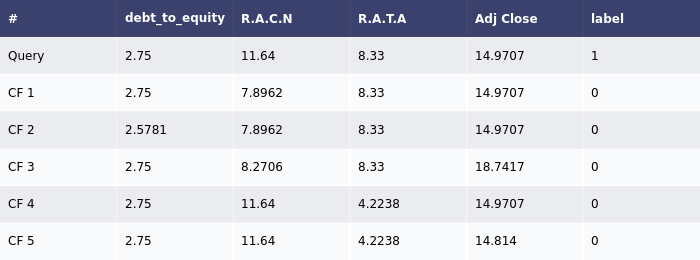

In [35]:
model_pickle='/kaggle/working/XGBClassifierr.pkl'
target_column = 'Label'
ignored_features = ["tic",'PB','Open', 'Volume']
explain_classification_model5(data, model_pickle,target_column, ignored_features,plot=True)

**Taking index=9**

In [36]:
def explain_classification_model5(data, model_pickle,target_column, ignored_features,plot=False):
    feature_names = list(data.columns)
    
    tabular_data = Tabular(
        data,
        feature_columns=feature_names,
        target_column='Label'
    )

    np.random.seed(1)
    transformer = TabularTransform().fit(tabular_data)
    class_names = transformer.class_names
    x = transformer.transform(tabular_data)
    train, test, labels_train, labels_test = \
        sklearn.model_selection.train_test_split(x[:, :-1], x[:, -1], train_size=0.80)

    model = joblib.load(model_pickle)
    model.fit(train, labels_train)

    predict_function = lambda z: model.predict_proba(transformer.transform(z))

    explainer = MACEExplainer(
        training_data=tabular_data,
        predict_function=predict_function,
        ignored_features=ignored_features
    )
    test_instances = tabular_data.remove_target_column()[0:12]
    explanations = explainer.explain(test_instances)
    
    if plot:
        buf = io.BytesIO()
        explanations.ipython_plot(index=9, class_names=class_names, renderer=buf)

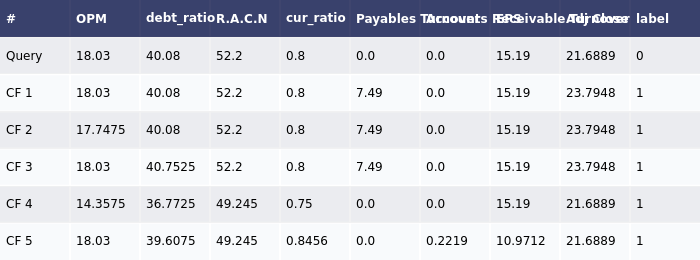

In [37]:
model_pickle='/kaggle/working/XGBClassifierr.pkl'
target_column = 'Label'
ignored_features = ["tic",'PB','Open', 'Volume']
explain_classification_model5(data, model_pickle,target_column, ignored_features,plot=True)

**Taking Multiple Index**

In [29]:
def explain_classification_models3(data, model_pickle,target_column, ignored_features, plot=False, plot_indices=None):
    feature_names = list(data.columns)
    
    tabular_data = Tabular(
        data,
        feature_columns=feature_names,
        target_column='Label'
    )

    np.random.seed(1)
    transformer = TabularTransform().fit(tabular_data)
    class_names = transformer.class_names
    x = transformer.transform(tabular_data)
    train, test, labels_train, labels_test = \
        sklearn.model_selection.train_test_split(x[:, :-1], x[:, -1], train_size=0.80)

    model = joblib.load(model_pickle)
    model.fit(train, labels_train)

    predict_function = lambda z: model.predict_proba(transformer.transform(z))

    explainer = MACEExplainer(
        training_data=tabular_data,
        predict_function=predict_function,
        ignored_features=ignored_features
    )
    test_instances = tabular_data.remove_target_column()[0:12]
    explanations = explainer.explain(test_instances)
    
    if plot:
        if plot_indices is None:
            plot_indices = [0]
        for index in plot_indices:
            buf = io.BytesIO()
            explanations.ipython_plot(index=index, class_names=class_names, renderer=buf)


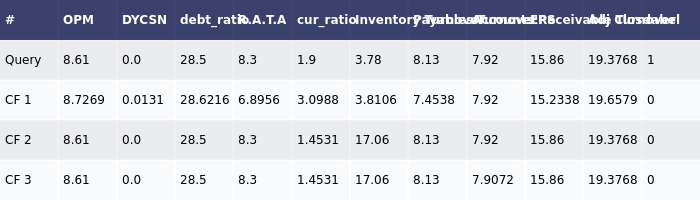

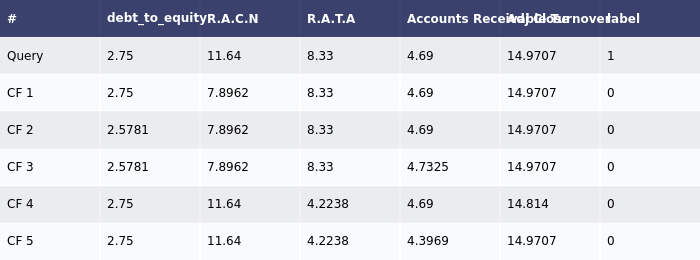

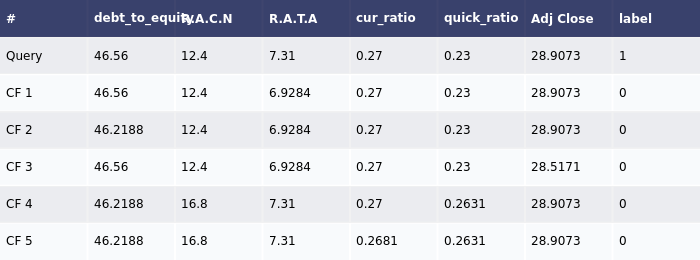

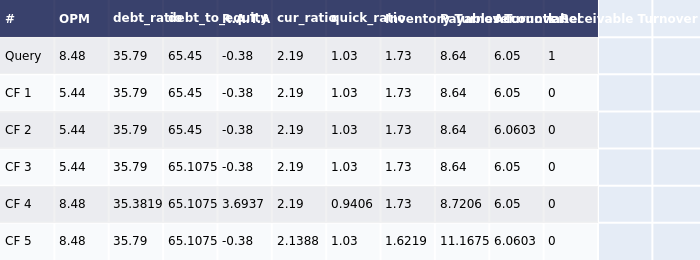

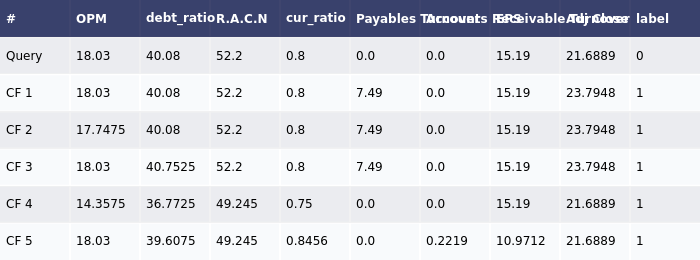

In [31]:
model_pickle='/kaggle/working/XGBClassifierr.pkl'
target_column = 'Label'
ignored_features = ["tic",'PB','Open', 'Volume']
explain_classification_models3(data, model_pickle, target_column, ignored_features, plot=True, plot_indices=[0,5,7,8,9])

**Mod**

In [21]:
feature_names = list(data.columns)
tabular_data = Tabular(data,feature_columns=feature_names,target_column='Label')

np.random.seed(1)
transformer = TabularTransform().fit(tabular_data)
class_names = transformer.class_names
x = transformer.transform(tabular_data)
train, test, labels_train, labels_test = \
    sklearn.model_selection.train_test_split(x[:, :-1], x[:, -1], train_size=0.80)

model = joblib.load(model_pickle)
model.fit(train, labels_train)

predict_function = lambda z: model.predict_proba(transformer.transform(z))

explainer = MACEExplainer(
    training_data=tabular_data,
    predict_function=predict_function,
    ignored_features=ignored_features
)
test_instances = tabular_data[0:12]

In [22]:
test_instances

              OPM  DYCSN  debt_ratio  debt_to_equity  R.A.C.N  R.A.T.A  \
date                                                                     
2008-03-31   8.61    0.0       28.50           67.00    17.80     8.30   
2008-03-31  11.47    0.0        0.08            0.33    72.24    19.00   
2008-03-31  31.09    0.0        8.43           11.80    17.92    14.22   
2008-03-31  23.77    0.0        0.00            0.00    11.00     8.85   
2008-03-31  20.72    0.0        0.00            0.00    30.37    17.77   
2008-03-31  12.57    0.0        1.98            2.75    11.64     8.33   
2008-03-31  19.35    4.1       41.50          135.71    27.75     9.88   
2008-03-31   9.90    0.0       26.91           46.56    12.40     7.31   
2008-03-31   8.48    0.0       35.79           65.45    -0.69    -0.38   
2008-03-31  18.03    0.0       40.08          172.79    52.20    11.51   
2008-03-31  27.23    0.0        0.04            0.05    16.06    14.37   
2008-03-31   4.95    0.0        0.20  

In [ ]:
test_instances